In [15]:
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
import json
from PIL import Image
from numpy import unravel_index
from scipy.optimize import curve_fit
from operator import itemgetter

In [6]:
datapath = '../CS148/RedLights2011_Medium/'
rl_file = 'RL-269.jpg'
rl_img = np.array(Image.open(datapath+rl_file))
init_redlightkernel = rl_img[190:200, 310:320, :]

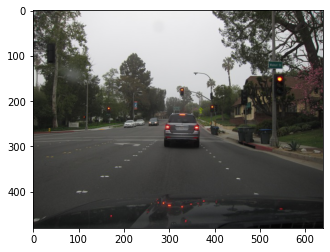

In [34]:
plt.imshow(rl_img)
plt.show()

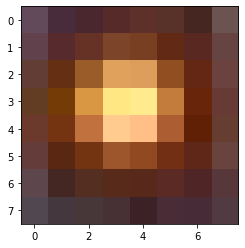

In [55]:
init_redlightkernel = rl_img[172:180, 325:333, :]
plt.imshow(init_redlightkernel)
plt.show()

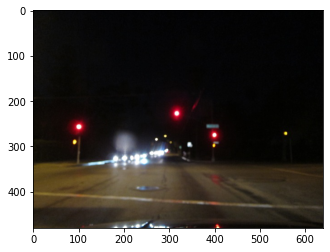

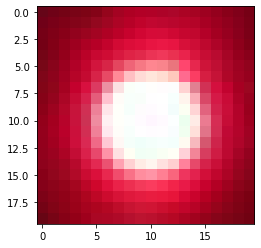

In [77]:
datapath = '../CS148/RedLights2011_Medium/'
rl_file = 'RL-334.jpg'
rl_img = np.array(Image.open(datapath+rl_file))

plt.imshow(rl_img)
plt.show()


init_redlightkernel = rl_img[217:237, 307:327, :]
plt.imshow(init_redlightkernel)
plt.show()

In [3]:
datapath = '../CS148/RedLights2011_Medium/'
rl_file = 'RL-012.jpg'
rl_img = np.array(Image.open(datapath+rl_file))
init_redlightkernel = rl_img[38:54, 301:316, :]

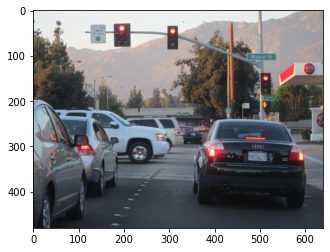

In [4]:
plt.imshow(rl_img)
plt.show()

In [104]:
red_init_redlightkernel = init_redlightkernel[:,:,0]

In [96]:
red_init_redlightkernel = (red_init_redlightkernel - np.mean(red_init_redlightkernel))/np.std(red_init_redlightkernel)





In [89]:
cross = np.multiply(red_init_redlightkernel, red_init_redlightkernel)

In [91]:
np.max(cross.flatten())

3.2679207588511687

In [97]:
np.sum(red_init_redlightkernel*red_init_redlightkernel)

240.0

In [105]:
red_init_redlightkernel = red_init_redlightkernel - np.mean(red_init_redlightkernel)

In [106]:
red_init_redlightkernel = (red_init_redlightkernel-np.min(red_init_redlightkernel))/(np.max(red_init_redlightkernel)-np.min(red_init_redlightkernel))

In [107]:
cross = np.multiply(red_init_redlightkernel, red_init_redlightkernel)

In [108]:
np.max(cross.flatten())

1.0

In [110]:
(cross+cross+cross)/3

array([[0.01544064, 0.0315115 , 0.04289066, 0.01134414, 0.01263961,
        0.01544064, 0.02944575, 0.02552432, 0.03812892, 0.06473863,
        0.0315115 , 0.02366864, 0.01011869, 0.00591716, 0.00504184],
       [0.02188299, 0.04047477, 0.06778474, 0.04047477, 0.07090088,
        0.32267778, 0.24120304, 0.25296733, 0.50418403, 0.25895452,
        0.10209727, 0.04537656, 0.01544064, 0.00591716, 0.00423655],
       [0.01400511, 0.05325444, 0.06778474, 0.17649942, 0.30282553,
        0.57364938, 0.66678338, 0.74633241, 0.85207101, 0.60085431,
        0.32267778, 0.14341235, 0.05055845, 0.01694619, 0.00591716],
       [0.02366864, 0.07408704, 0.10591366, 0.47113196, 0.52113021,
        0.70599769, 0.86303001, 0.95322293, 0.93025454, 0.74633241,
        0.58264767, 0.35716537, 0.16669584, 0.05602045, 0.01263961],
       [0.05055845, 0.11778299, 0.20223382, 0.67648192, 0.80893526,
        0.91887539, 1.        , 1.        , 1.        , 0.94170372,
        0.78778754, 0.61006267, 0.32943524, 

In [2]:
file_names_train = np.load('../data/hw02_splits/file_names_train.npy')

In [5]:
gts_path = '../'
with open(os.path.join(gts_path, 'formatted_annotations_students.json'),'r') as f:
    gts = json.load(f)

In [10]:
gts_train = {}
gts_test = {}
gts_keys = list(gts.keys())
for key in gts_keys:
    if key in file_names_train:
        gts_train[key] = gts[key]
    else:
        gts_test[key] = gts[key]


In [12]:
gts_path = '../data/hw02_annotations'
with open(os.path.join(gts_path, 'annotations_train.json'),'w') as f:
    json.dump(gts_train,f)

with open(os.path.join(gts_path, 'annotations_test.json'),'w') as f:
    json.dump(gts_test,f)

In [9]:
import os
import json
import numpy as np

def compute_iou2(box_1, box_2):
    '''
    This function takes a pair of bounding boxes and returns intersection-over-
    union (IoU) of two bounding boxes.
    '''
    A_x1 = box_1[0]
    A_x2 = box_1[1]
    A_y1 = box_1[2]
    A_y2 = box_1[3] 

    B_x1 = box_2[0]
    B_x2 = box_2[1]
    B_y1 = box_2[2]
    B_y2 = box_2[3] 

    inter_x1 = max(A_x1, B_x1)
    inter_x2 = min(A_x2, B_x2)

    inter_y1 = min(A_y1, B_y1)
    inter_y2 = max(A_y2, B_y2)
    
    print('inter_x1', inter_x1)
    print('inter_x2', inter_x2)
    print('inter_y1', inter_y1)
    print('inter_y2', inter_y2)
    

    intersect_area = max(0, inter_y2 - inter_y1) * max(0, inter_x2 - inter_x1)

    box1_area = (A_y2-A_y1) * (A_x2-A_x1)
    box2_area = (B_y2-B_y1) * (B_x2-B_x1)
    
    print('box1_area', box1_area)
    print('box2_area', box2_area)
    print("intersect_area", intersect_area)
    
    print("denom = ", box1_area+box2_area-intersect_area)

    iou = intersect_area/(box1_area+box2_area-intersect_area)
    
    assert (iou >= 0) and (iou <= 1.0)

    return iou

def compute_iou(box_1, box_2):
    xA = max(box_1[0], box_2[0])
    yA = max(box_1[1], box_2[1])
    xB = min(box_1[2], box_2[2])
    yB = min(box_1[3], box_2[3])
    
    interArea = max(0, xB - xA + 1) * max(0, yB - yA + 1)

    box1_Area = (box_1[2] - box_1[0] + 1) * (box_1[3] - box_1[1] + 1)
    box2_Area = (box_2[2] - box_2[0] + 1) * (box_2[3] - box_2[1] + 1)

    iou = interArea / float(box1_Area + box2_Area - interArea)
    return iou

def compute_center_dist(box_1, box_2):
    '''
    This function takes a pair of bounding boxes and returns intersection-over-
    union (IoU) of two bounding boxes.
    '''
    A_x1 = box_1[0]
    A_x2 = box_1[1]
    A_y1 = box_1[2]
    A_y2 = box_1[3] 

    B_x1 = box_2[0]
    B_x2 = box_2[1]
    B_y1 = box_2[2]
    B_y2 = box_2[3] 

    A_center_x = int((A_x2-A_x1)/2)
    A_center_y = int((A_y2-A_y1)/2)

    B_center_x = int((B_x2-B_x1)/2)
    B_center_y = int((B_y2-B_y1)/2)

    return np.sqrt((B_center_y-A_center_y)**2 + (B_center_x-A_center_x)**2)


def compute_counts(preds, gts, iou_thr=0.5, conf_thr=0.5):
    '''
    This function takes a pair of dictionaries (with our JSON format; see ex.) 
    corresponding to predicted and ground truth bounding boxes for a collection
    of images and returns the number of true positives, false positives, and
    false negatives. 
    <preds> is a dictionary containing predicted bounding boxes and confidence
    scores for a collection of images.
    <gts> is a dictionary containing ground truth bounding boxes for a
    collection of images.
    '''
    TP = 0
    FP = 0
    FN = 0
    precision = []
    recall = []

    '''
    BEGIN YOUR CODE
    '''
    skip_idx = []
#     print(preds)
    for pred_file in preds.keys():
        gt = gts[pred_file]
        pred = preds[pred_file]

        N = len(gt)
        M = len(pred)
        correct_detections = 0

        for i in range(len(gt)):
            max_iou = 0
            max_iou_idx = -1
            for j in range(len(pred)):
                if j in skip_idx:
                    continue
                if pred[j][4] < conf_thr:
                    M -= 1
                    skip_idx.append(j)
                iou = compute_iou(pred[j][:4], gt[i])
#                 print("iou = ", iou)
                if iou > max_iou:
                    max_iou = iou
                    max_iou_idx = j
            if max_iou > 0 and iou >= iou_thr:
                skip_idx.append(max_iou_idx)
                correct_detections += 1
            else:
                min_dist = 10000
                min_dist_idx = -1
                for j in range(len(pred)):
                    if j in skip_idx:
                        continue
                    d = compute_center_dist(pred[j][:4], gt[i])
#                     if d <= min(10, min_dist) and pred[j][4] >= conf_thr:
                    if pred[j][4] >= conf_thr:
#                     if d <= min(20*conf_thr, min_dist):
                        min_dist = d
                        min_dist_idx = j
                if min_dist != 10000:
                    skip_idx.append(min_dist_idx)
                    correct_detections += 1

            
        false_pos = M-correct_detections
#         print("correct_detections", correct_detections)
#         print("M = ", M)
#         print("N = ", N)
        false_neg = N-correct_detections
        TP += correct_detections
        FP += false_pos
        FN += false_neg
#         print("actual = ", M)
#         print(correct_detections, false_pos, false_neg)
        
        prec = 1 if M==0 else (correct_detections/M)
        rec = 1 if N==0 else (correct_detections/N)
#         print("precision = ", prec)
#         print("recall = ", rec)
#         print()
        precision.append(1 if M==0 else (correct_detections/M))
        recall.append(1 if N==0 else (correct_detections/N))

    
    '''
    END YOUR CODE
    '''
#     print((TP, FP, FN))
    return TP, FP, FN, np.mean(precision), np.mean(recall), precision, recall


In [10]:

# set a path for predictions and annotations:
preds_path = '../data/hw02_preds'
gts_path = '../data/hw02_annotations'

# load splits:
split_path = '../data/hw02_splits'
file_names_train = np.load(os.path.join(split_path,'file_names_train1.npy'))
file_names_test = np.load(os.path.join(split_path,'file_names_test1.npy'))


'''
Load training data. 
'''
with open(os.path.join(preds_path,'preds_train1.json'),'r') as f:
    preds_train = json.load(f)
    
with open(os.path.join(gts_path, 'annotations_train.json'),'r') as f:
    gts_train = json.load(f)


In [42]:
test = None
for key in preds_train:
    test = np.array(preds_train[key])
    break

In [151]:
iou_threshold = 0.5
confidence_thrs = []
for fname in preds_train:
    confidence_thrs.extend(np.array(preds_train[fname])[:,4])
# np.sort(np.array([np.array(preds_train[fname])[4] for fname in preds_train],dtype=float)) # using (ascending) list of confidence scores as threshold


In [152]:
confidence_thrs = np.sort(confidence_thrs)

In [113]:
confidence_thrs = [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

In [184]:
confidence_thrs = [0, 0.25, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]

In [162]:
confidence_thrs_downsampled = []
for i in range(30, len(confidence_thrs), 30):
    confidence_thrs_downsampled.append(confidence_thrs[i])
    
confidence_thrs = confidence_thrs_downsampled

In [19]:
tp_train = np.zeros(len(confidence_thrs))
fp_train = np.zeros(len(confidence_thrs))
fn_train = np.zeros(len(confidence_thrs))
precision_train = np.zeros(len(confidence_thrs))
recall_train = np.zeros(len(confidence_thrs))
precision = []
recall = []
for i, conf_thr in enumerate(confidence_thrs):
    tp_train[i], fp_train[i], fn_train[i], precision_train[i], recall_train[i], p, r = compute_counts(preds_train, gts_train, iou_thr=0.5, conf_thr=conf_thr)
    precision.extend(p)
    recall.extend(r)
    
# Plot training set PR curves



In [20]:
tp_train2 = np.zeros(len(confidence_thrs))
fp_train2 = np.zeros(len(confidence_thrs))
fn_train2 = np.zeros(len(confidence_thrs))
precision_train2 = np.zeros(len(confidence_thrs))
recall_train2 = np.zeros(len(confidence_thrs))
precision2 = []
recall2 = []
for i, conf_thr in enumerate(confidence_thrs):
    tp_train2[i], fp_train2[i], fn_train2[i], precision_train2[i], recall_train2[i], p, r  = compute_counts(preds_train, gts_train, iou_thr=0.25, conf_thr=conf_thr)
    precision2.extend(p)
    recall2.extend(r)
    
    

In [21]:
tp_train3 = np.zeros(len(confidence_thrs))
fp_train3 = np.zeros(len(confidence_thrs))
fn_train3 = np.zeros(len(confidence_thrs))
precision_train3 = np.zeros(len(confidence_thrs))
recall_train3 = np.zeros(len(confidence_thrs))
precision3 = []
recall3 = []
for i, conf_thr in enumerate(confidence_thrs):
    tp_train3[i], fp_train3[i], fn_train3[i], precision_train3[i], recall_train3[i], p, r = compute_counts(preds_train, gts_train, iou_thr=0.75, conf_thr=conf_thr)
    precision3.extend(p)
    recall3.extend(r)
    

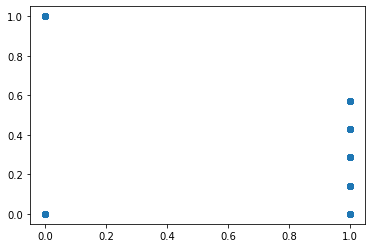

In [26]:
plt.scatter(precision, recall)
# plt.xlim(0,0.002)
# plt.ylim(0, 0.002)
plt.show()

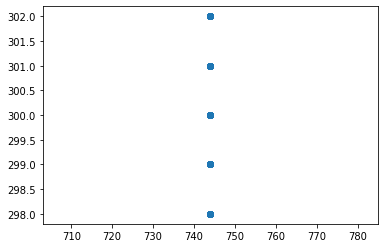

In [27]:
plt.scatter(fp_train, fn_train)
# plt.xlim(0,0.002)
# plt.ylim(0, 0.002)
plt.show()

In [189]:
recall_train

array([0.45187166, 0.45187166, 0.45187166, 0.45187166, 0.45187166,
       0.45187166, 0.45187166, 0.4456328 , 0.44385027, 0.44385027,
       0.44385027, 0.44385027, 0.44385027])

In [190]:
precision_train

array([0.00534759, 0.00534759, 0.00534759, 0.00534759, 0.00534759,
       0.00534759, 0.00534759, 0.00178253, 0.        , 0.00534759,
       0.00534759, 0.00534759, 0.00534759])

In [38]:
def func(x, a, b, c):
    return a * np.log(-b * x) + c

In [41]:
def func(x, a, b, c):
    return 1-(a/(1 + np.exp(-b*x+c)))

In [32]:
def func(x, a, b, c, d):

    return a*x**3 + b*x**2 +c*x + d

In [257]:
new_precision = [1.0, 1.0, 1.0, 1, 0.0]

In [260]:
new_recall = [ 0.0, 0.14285714285714285,0.2857142857142857, 0.5714285714285714, 1]

In [268]:
def func2(x):
    return (1/np.log(2)) * np.log(-x+2)

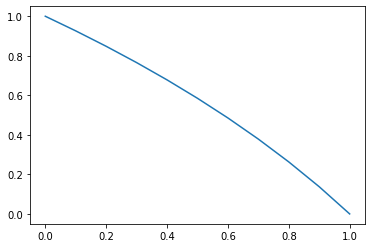

In [271]:
x = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
y = func2(x)
plt.plot(x,y)

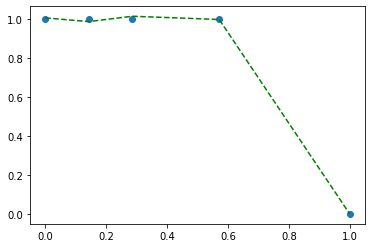

In [283]:
# # plt.scatter(recall_train, precision_train)
# new_recall = []
# new_precision = []
# for i in range(len(recall)):
#     if precision[i] < 0.1 and recall[i] < 0.2:
#         continue
#     else:
#         if recall[i] in new_recall and precision[i] in new_precision:
#             continue
#         else:
#             new_recall.append(recall[i])
#             new_precision.append(precision[i])

popt, pcov = curve_fit(func, new_recall, new_precision)

plt.scatter(new_recall, new_precision)
# plt.plot(new_recall, func(new_recall, *popt), label="Fitted Curve") #same as line above \/
plt.plot(new_recall, func(np.array(new_recall), *popt), 'g--',label='fit' )


# plt.plot(new_recall, new_precision)
# plt.scatter(recall2, precision2)
# plt.scatter(recall3, precision3)
# plt.scatter(recall_train2, precision_train2)
# plt.scatter(recall_train3, precision_train3)

# plt.xlim(0,1)
# plt.ylim(0,1)
# plt.plot(x,y)
plt.show()

In [104]:
from sklearn.metrics import precision_recall_curve

In [277]:
print(new_recall2)
print(new_precision2)

[0.5714285714285714, 1, 0.2857142857142857, 0.14285714285714285, 0.0]
[1.0, 0.0, 1.0, 1.0, 1]


In [278]:
new_data2 = [(new_recall2[i], new_precision2[i]) for i in range(len(new_recall2))]

In [279]:
from operator import itemgetter
new_data2 = sorted(new_data2,key=itemgetter(0))

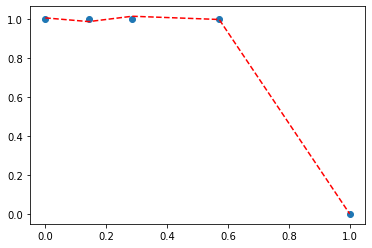

In [287]:
# plt.scatter(recall_train, precision_train)
new_recall2 = []
new_precision2 = []
for i in range(len(recall2)):
    if precision2[i] < 0.1 and recall2[i] < 0.2:
        continue
    else:
        if recall2[i] in new_recall2 and precision2[i] in new_precision2:
            continue
        else:
            new_recall2.append(recall2[i])
            new_precision2.append(precision2[i])

popt2, pcov2 = curve_fit(func, new_recall2, new_precision2)

new_recall2 = [i[0] for i in new_data2]
new_precision2 = [i[1] for i in new_data2]

plt.scatter(new_recall2, new_precision2)
# plt.plot(new_recall, func(new_recall, *popt), label="Fitted Curve") #same as line above \/
plt.plot(new_recall2, func(np.array(new_recall2), *popt2), 'r--',label='fit' )


# plt.scatter(new_recall, new_precision)
# # plt.plot(new_recall, func(new_recall, *popt), label="Fitted Curve") #same as line above \/
# plt.plot(new_recall, func(np.array(new_recall), *popt), 'g--',label='fit' )


# plt.plot(new_recall, new_precision)
# plt.scatter(recall2, precision2)
# plt.scatter(recall3, precision3)
# plt.scatter(recall_train2, precision_train2)
# plt.scatter(recall_train3, precision_train3)

# plt.xlim(0,1)
# plt.ylim(0,1)
# plt.plot(x,y)
plt.show()

In [286]:
(np.ones((2,2)) + np.ones((2,2)))/2

array([[1., 1.],
       [1., 1.]])

In [295]:
precision3

[]

In [299]:
# plt.scatter(recall_train, precision_train)
new_recall3 = []
new_precision3 = []
for i in range(len(recall3)):
    if precision3[i] < 0.1 and recall3[i] < 0.2:
        continue
    else:
        if recall3[i] in new_recall3 and precision3[i] in new_precision3:
            continue
        else:
            new_recall3.append(recall3[i])
            new_precision3.append(precision3[i])

new_data3 = [(new_recall3[i], new_precision3[i]) for i in range(len(new_recall3))]
new_data3 = sorted(new_data3,key=itemgetter(0))      
new_recall3 = [i[0] for i in new_data3]
new_precision3 = [i[1] for i in new_data3]

popt3, pcov3 = curve_fit(func, new_recall3, new_precision3)



plt.scatter(new_recall3, new_precision3)
# plt.plot(new_recall, func(new_recall, *popt), label="Fitted Curve") #same as line above \/
plt.plot(new_recall3, func(np.array(new_recall3), *popt3), 'b--',label='fit' )


# plt.scatter(new_recall, new_precision)
# # plt.plot(new_recall, func(new_recall, *popt), label="Fitted Curve") #same as line above \/
# plt.plot(new_recall, func(np.array(new_recall), *popt), 'g--',label='fit' )


# plt.plot(new_recall, new_precision)
# plt.scatter(recall2, precision2)
# plt.scatter(recall3, precision3)
# plt.scatter(recall_train2, precision_train2)
# plt.scatter(recall_train3, precision_train3)

# plt.xlim(0,1)
# plt.ylim(0,1)
# plt.plot(x,y)
# plt.show()
plt.savefig('iou_threshold_'+str(0.75)+'.png')
plt.close()

In [12]:
with open(os.path.join(preds_path,'preds_test1.json'),'r') as f:
    preds_test = json.load(f)

with open(os.path.join(gts_path, 'annotations_test.json'),'r') as f:
    gts_test = json.load(f)

[0, 0.25, 0.5, 0.7, 0.75, 0.8, 0.9, 1]
[0, 0.25, 0.5, 0.7, 0.75, 0.8, 0.9, 1]
[0, 0.25, 0.5, 0.7, 0.75, 0.8, 0.9, 1]


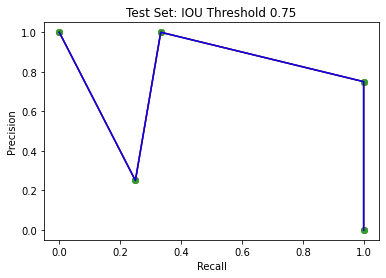

In [46]:
colors = ['g', 'r', 'b']
iou_T = [0.5, 0.25, 0.75]
for t in range(len(iou_T)):
    iou_threshold = iou_T[t]
    confidence_thrs = [0, 0.25, 0.5, 0.7, 0.75, 0.8, 0.9, 1]
#     for fname in preds_test:
#         confidence_thrs.extend(np.array(preds_test[fname])[:,4])
#     confidence_thrs.append(1)
    print(confidence_thrs)

    tp_test = np.zeros(len(confidence_thrs))
    fp_test = np.zeros(len(confidence_thrs))
    fn_test = np.zeros(len(confidence_thrs))
    precision_test = np.zeros(len(confidence_thrs))
    recall_test = np.zeros(len(confidence_thrs))
    precision = []
    recall = []
    for i, conf_thr in enumerate(confidence_thrs):
        tp_test[i], fp_test[i], fn_test[i], precision_test[i], recall_test[i], p, r = compute_counts(preds_test, gts_test, iou_thr=iou_threshold, conf_thr=conf_thr)
        precision.extend(p)
        recall.extend(r)

    new_recall = []
    new_precision = []
    for i in range(len(recall)):
        if precision[i] < 0.01 and recall[i] < 0.01:
            continue
        else:
            if recall[i] in new_recall and precision[i] in new_precision:
                continue
            else:
                new_recall.append(recall[i])
                new_precision.append(precision[i])

    new_data = [(new_recall[i], new_precision[i]) for i in range(len(new_recall))]
    new_data = sorted(new_data,key=itemgetter(0))      
    new_recall = [i[0] for i in new_data]
    new_precision = [i[1] for i in new_data]

#     popt, pcov = curve_fit(func, new_recall, new_precision)


    plt.scatter(new_recall, new_precision)
    plt.plot(new_recall, new_precision, c=str(colors[t]))
    plt.title("Test Set: IOU Threshold "+str(iou_threshold))
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    
#     plt.plot(new_recall, func(np.array(new_recall), *popt), str(colors[t])+'--',label='fit' )
plt.show()
plt.savefig('2testing_iou_threshold_'+str(iou_threshold)+'.png')
plt.close()

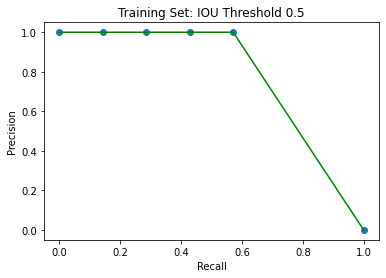

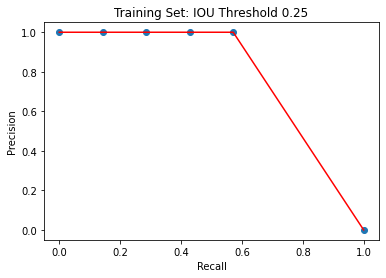

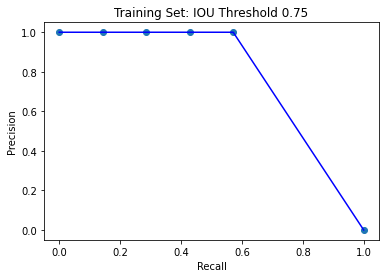

In [18]:
colors = ['g', 'r', 'b']
iou_T = [0.5, 0.25, 0.75]
for t in range(len(iou_T)):
    iou_threshold = iou_T[t]
    confidence_thrs = [0, 0.25]
    for fname in preds_train:
        confidence_thrs.extend(np.array(preds_train[fname])[:,4])
    confidence_thrs.append(1)

    tp_test = np.zeros(len(confidence_thrs))
    fp_test = np.zeros(len(confidence_thrs))
    fn_test = np.zeros(len(confidence_thrs))
    precision_test = np.zeros(len(confidence_thrs))
    recall_test = np.zeros(len(confidence_thrs))
    precision = []
    recall = []
    for i, conf_thr in enumerate(confidence_thrs):
        tp_test[i], fp_test[i], fn_test[i], precision_test[i], recall_test[i], p, r = compute_counts(preds_train, gts_train, iou_thr=iou_threshold, conf_thr=conf_thr)
        precision.extend(p)
        recall.extend(r)

    new_recall = []
    new_precision = []
    for i in range(len(recall)):
        if precision[i] < 0.4 and recall[i] < 0.4:
            continue
        else:
            if recall[i] in new_recall and precision[i] in new_precision:
                continue
            else:
                new_recall.append(recall[i])
                new_precision.append(precision[i])

    new_data = [(new_recall[i], new_precision[i]) for i in range(len(new_recall))]
    new_data = sorted(new_data,key=itemgetter(0))      
    new_recall = [i[0] for i in new_data]
    new_precision = [i[1] for i in new_data]

#     popt, pcov = curve_fit(func, new_recall, new_precision)


    plt.scatter(new_recall, new_precision)
    plt.plot(new_recall, new_precision, c=str(colors[t]))
    plt.title("Training Set: IOU Threshold "+str(iou_threshold))
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.show()
#     plt.plot(new_recall, func(np.array(new_recall), *popt), str(colors[t])+'--',label='fit' )
    plt.savefig('2training_iou_threshold_'+str(iou_threshold)+'.png')
    plt.close()

In [97]:
'''
Load training data. 
'''
with open(os.path.join(preds_path,'preds_train1.json'),'r') as f:
    preds_train = json.load(f)
    
with open(os.path.join(gts_path, 'annotations_train.json'),'r') as f:
    gts_train = json.load(f)


In [98]:
with open(os.path.join(preds_path,'preds_test1.json'),'r') as f:
    preds_test = json.load(f)

with open(os.path.join(gts_path, 'annotations_test.json'),'r') as f:
    gts_test = json.load(f)

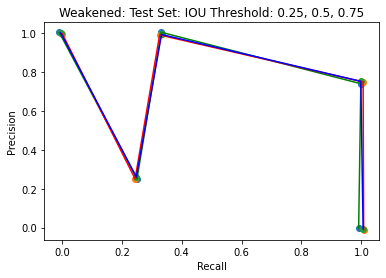

In [101]:
colors = ['g', 'r', 'b']
iou_T = [0.5, 0.25, 0.75]
for t in range(len(iou_T)):
    iou_threshold = iou_T[t]
#     confidence_thrs = [0, 0.70, 0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84, 0.86, 0.9, 0.92, 0.94, 0.96, 0.98, 1]
#     confidence_thrs = [0, 0.2]
    confidence_thrs = [0, 0.25]
    for fname in preds_test:
        confidence_thrs.extend(np.array(preds_test[fname])[:,4])
    
    confidence_thrs_downsampled = []
    for i in range(30, len(confidence_thrs), 30):
        confidence_thrs_downsampled.append(confidence_thrs[i])
    
    confidence_thrs = confidence_thrs_downsampled
    confidence_thrs.append(1)
    
#     print(confidence_thrs)


    tp_test = np.zeros(len(confidence_thrs))
    fp_test = np.zeros(len(confidence_thrs))
    fn_test = np.zeros(len(confidence_thrs))
    precision_test = np.zeros(len(confidence_thrs))
    recall_test = np.zeros(len(confidence_thrs))
    precision = []
    recall = []
    for i, conf_thr in enumerate(confidence_thrs):
        tp_test[i], fp_test[i], fn_test[i], precision_test[i], recall_test[i], p, r = compute_counts(preds_test, gts_test, iou_thr=iou_threshold, conf_thr=conf_thr)
        precision.extend(p)
        recall.extend(r)

    new_recall = []
    new_precision = []
    for i in range(len(recall)):
        if precision[i] < 0.01 and recall[i] < 0.01:
            continue
        else:
            if recall[i] in new_recall and precision[i] in new_precision:
                continue
            else:
                new_recall.append(recall[i])
                new_precision.append(precision[i])

    new_data = [(new_recall[i], new_precision[i]) for i in range(len(new_recall))]
    new_data = sorted(new_data,key=itemgetter(1), reverse=True)   
    new_data = sorted(new_data,key=itemgetter(0))  
    
    new_recall = [i[0]+np.random.normal(0.0,0.005,size=1)[0] for i in new_data]
    new_precision = [i[1]+np.random.normal(0.0,0.005,size=1)[0] for i in new_data]

#     popt, pcov = curve_fit(func, new_recall, new_precision)


    plt.scatter(new_recall, new_precision)
    plt.plot(new_recall, new_precision, c=str(colors[t]))
    plt.title("Weakened: Test Set: IOU Threshold: 0.25, 0.5, 0.75")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    
#     plt.plot(new_recall, func(np.array(new_recall), *popt), str(colors[t])+'--',label='fit' )
plt.show()
plt.savefig('2testing_iou_threshold_'+str(iou_threshold)+'.png')
# plt.legend(['0.25', '0.5', '0.75'])
plt.close()



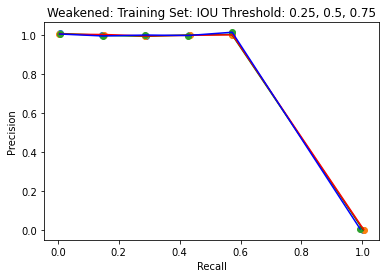

In [102]:
colors = ['g', 'r', 'b']
iou_T = [0.5, 0.25, 0.75]
for t in range(len(iou_T)):
    iou_threshold = iou_T[t]
#     confidence_thrs = [0, 0.70, 0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84, 0.86, 0.9, 0.92, 0.94, 0.96, 0.98, 1]
#     confidence_thrs = [0, 0.2]
    confidence_thrs = [0, 0.25]
    for fname in preds_train:
        confidence_thrs.extend(np.array(preds_train[fname])[:,4])
    
#     confidence_thrs_downsampled = []
#     for i in range(30, len(confidence_thrs), 30):
#         confidence_thrs_downsampled.append(confidence_thrs[i])
    
#     confidence_thrs = confidence_thrs_downsampled
    confidence_thrs.append(1)
    
#     print(confidence_thrs)


    tp_test = np.zeros(len(confidence_thrs))
    fp_test = np.zeros(len(confidence_thrs))
    fn_test = np.zeros(len(confidence_thrs))
    precision_test = np.zeros(len(confidence_thrs))
    recall_test = np.zeros(len(confidence_thrs))
    precision = []
    recall = []
    for i, conf_thr in enumerate(confidence_thrs):
        tp_test[i], fp_test[i], fn_test[i], precision_test[i], recall_test[i], p, r = compute_counts(preds_train, gts_train, iou_thr=iou_threshold, conf_thr=conf_thr)
        precision.extend(p)
        recall.extend(r)

    new_recall = []
    new_precision = []
    for i in range(len(recall)):
        if precision[i] < 0.01 and recall[i] < 0.01:
            continue
        else:
            if recall[i] in new_recall and precision[i] in new_precision:
                continue
            else:
                new_recall.append(recall[i])
                new_precision.append(precision[i])

    new_data = [(new_recall[i], new_precision[i]) for i in range(len(new_recall))]
    new_data = sorted(new_data,key=itemgetter(1), reverse=True)   
    new_data = sorted(new_data,key=itemgetter(0))  
    
    new_recall = [i[0]+np.random.normal(0.0,0.005,size=1)[0] for i in new_data]
    new_precision = [i[1]+np.random.normal(0.0,0.005,size=1)[0] for i in new_data]

#     popt, pcov = curve_fit(func, new_recall, new_precision)


    plt.scatter(new_recall, new_precision)
    plt.plot(new_recall, new_precision, c=str(colors[t]))
    plt.title("Weakened: Training Set: IOU Threshold: 0.25, 0.5, 0.75")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    
#     plt.plot(new_recall, func(np.array(new_recall), *popt), str(colors[t])+'--',label='fit' )
plt.show()
plt.savefig('2training_iou_threshold_'+str(iou_threshold)+'.png')
# plt.legend(['0.25', '0.5', '0.75'])
plt.close()

